In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = [224, 224]

train_path = "D:/Automatic-Waste-Classification-using-Deep-Learning-ResNet50-architecture-main/DATASET/TRAIN/"
valid_path = "D:/Automatic-Waste-Classification-using-Deep-Learning-ResNet50-architecture-main/DATASET/TEST/"

In [6]:
# Import the Resnet50 architecture
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 36s 0us/step


In [7]:
for layer in resnet.layers:
    layer.trainable = False

In [8]:
folders = glob('D:/Automatic-Waste-Classification-using-Deep-Learning-ResNet50-architecture-main/DATASET/TRAIN/*')

In [9]:
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('D:/Automatic-Waste-Classification-using-Deep-Learning-ResNet50-architecture-main/DATASET/TRAIN/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:/Automatic-Waste-Classification-using-Deep-Learning-ResNet50-architecture-main/DATASET/TRAIN/'

In [14]:
test_set = test_datagen.flow_from_directory('D:/Automatic-Waste-Classification-using-Deep-Learning-ResNet50-architecture-main/DATASET/TEST',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2513 images belonging to 2 classes.


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
MODEL_DIR = "D:/Automatic-Waste-Classification-using-Deep-Learning-ResNet50-architecture-main/DATASET"

if not os.path.exists(MODEL_DIR):  #If the directory does not exist, create it.
    os.makedirs(MODEL_DIR)
checkpoint = ModelCheckpoint(filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"), save_best_only=True) 

In [17]:
import scipy
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\Users\prathap\anaconda3\envs\cycle\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
706/706 [==============================] - 1634s 2s/step - loss: 0.7396 - accuracy: 0.6872 - val_loss: 0.5552 - val_accuracy: 0.7979
Epoch 2/5
706/706 [==============================] - 1665s 2s/step - loss: 0.6927 - accuracy: 0.7236 - val_loss: 1.1649 - val_accuracy: 0.6200
Epoch 3/5
706/706 [==============================] - 1580s 2s/step - loss: 0.6795 - accuracy: 0.7407 - val_loss: 0.9201 - val_accuracy: 0.7051
Epoch 4/5
706/706 [==============================] - 1801s 3s/step - loss: 0.6058 - accuracy: 0.7604 - val_loss: 0.6350 - val_accuracy: 0.7871
Epoch 5/5
706/706 [==============================] - 1584s 2s/step - loss: 0.6565 - accuracy: 0.7561 - val_loss: 0.7574 - val_accuracy: 0.7652


In [ ]:
pip install scipy

     ---------------------------------------- 34.1/34.1 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
face-alignment 1.4.1 requires opencv-python, which is not installed.
face-alignment 1.4.1 requires scikit-image, which is not installed.
face-alignment 1.4.1 requires torch, which is not installed.
face-alignment 1.4.1 requires tqdm, which is not installed.


In [ ]:
pip install pillow
 

SyntaxError: invalid syntax (1501456428.py, line 1)

In [ ]:
pip install --user Pillow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install image

  Using cached image-1.5.33.tar.gz (15 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.9/7.9 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 41.2/41.2 kB ? eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19489 sha256=e525727df475bfd76bffda82c5670f47430c26063faf7a563096a9a5c116fb54
  Stored in directory: c:\users\prathap\appdata\local\pip\cache\wheels\23\29\74\b2ac5172832c36fb4cb4126f66765568099d9ddaf8a8613502
Successfully built image
Note: you may need to restart the kernel to use updated packages.


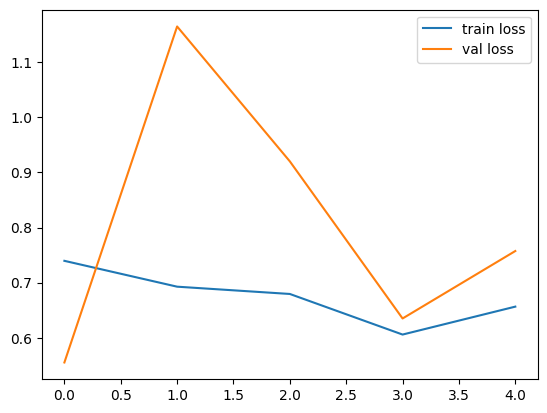

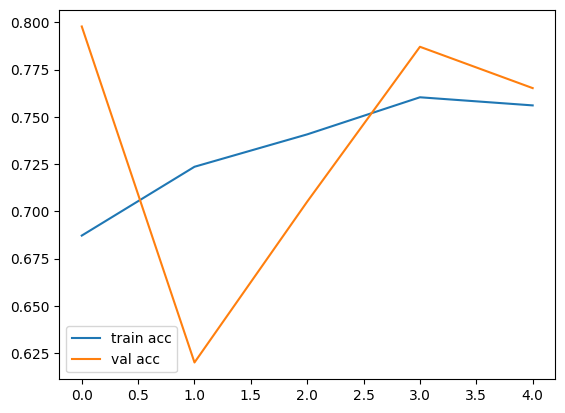

In [18]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss_eff')

# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc_eff')

In [20]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2


ImportError: cannot import name 'img_to_array' from 'keras.preprocessing.image' (C:\Users\prathap\AppData\Roaming\Python\Python37\site-packages\keras\preprocessing\image.py)

In [19]:
from tensorflow.keras.models import load_model

model.save('resnet.h5')

In [21]:
y_pred = model.predict(test_set)

79/79 [==============================] - 168s 2s/step


In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('resnet.h5')

In [ ]:
# test data to check model and predict 
img = image.load_img('../input/waste-classification-data/DATASET/TEST/O/O_12577.jpg', target_size = (224, 224))

In [ ]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
result = model.predict(img)

In [ ]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
training_set.class_indices

In [ ]:
if result[0][0] == 1:
    prediction = 'Recyclable'
else:
    prediction = 'Organic'

In [ ]:
prediction